# **STLMPD Analysis Notebook**
## Independent Study
### *Carter Hanford*
#### *November 11th, 2020*


### ***Introduction***

In this notebook we'll examine data accessed via the St. Louis Metropolitan Police Department. In this data, we have instances of non-violent crime with the corresponding address, neighborhood, and address from 2010-2018. The objective of this notebook is to visualize and perform some machine learning techniques on the data to indicate whether or not it is suitable for further ML analysis. Since the data from STLMPD lacks "predictable" variables, much of this notebook will be exploration and analyzing the dataset, looking for indications that a ML analysis could be performed if we can pair the STLMPD data with another dataset with more features.

The analysis attempts to find parallels between data from the St. Louis Metropolitan Police Department and the effects of historical redlining, the systematic denial of services by government, both local and national, and the private sector which disproportionately affects minority communities. In general, overpolicing tends to take place more in minority communities, such as ones affected by historical redlining in St. Louis City. Thus, one can argue that African American communities are arrested more on average for crimes that have little threat or inherent violence associated with them. For this reason, the dataset from the STLMPD is subset into crimes that are deemed "non-threatening," or crimes that police may or may not target African American's more for such as loitering. The idea here is to examine the STLMPD data to indicate whether or not these crimes take place in areas of the city that are predominately black, or are areas that were historically redlined zones. 

This data was cleaned and subset in **RStudio**, and the clean csv file was uploaded to google drive and accessed via a google drive mount. Special thanks to Christopher Prener, PhD., Cree Foeller, & Taylor Braswell for their [*compstatr*](https://github.com/slu-openGIS/compstatr) R package which allowed us to access the STLMPD data.

In [1]:
# import google colab drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# set working directory
%cd /content/drive/'My Drive'/Data

/content/drive/My Drive/Data


In [3]:
# read in stl data
import pandas as pd
stlcrime = pd.read_csv("stlcrime.csv")
stlcrime.head(5)

,year,crime,district,neighborhood,address,description
0,2010-05,241100,6,79,8430 HALL,DISORDERLY CONDUCT-PEACE DSTRB/INDIVIDUAL
1,2010-05,266999,4,61,1827 OFALLON ST,PUBLIC ORDER-OTHR UNSPC PBLC ORDER VIOLATION
2,2010-05,266999,4,62,1228 N 9TH ST,PUBLIC ORDER-OTHR UNSPC PBLC ORDER VIOLATION
3,2010-05,266999,4,33,1541 CASTLE LN,PUBLIC ORDER-OTHR UNSPC PBLC ORDER VIOLATION
4,2010-05,266999,4,33,1106 GRATTAN ST,PUBLIC ORDER-OTHR UNSPC PBLC ORDER VIOLATION


In [4]:
# create encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# create copy for classification analysis
stlcrime_copy = stlcrime.copy()

# convert to encoded labels
stlcrime_copy['description'] = encoder.fit_transform(stlcrime_copy['description'])
stlcrime_copy.head(5)

,year,crime,district,neighborhood,address,description
0,2010-05,241100,6,79,8430 HALL,0
1,2010-05,266999,4,61,1827 OFALLON ST,4
2,2010-05,266999,4,62,1228 N 9TH ST,4
3,2010-05,266999,4,33,1541 CASTLE LN,4
4,2010-05,266999,4,33,1106 GRATTAN ST,4


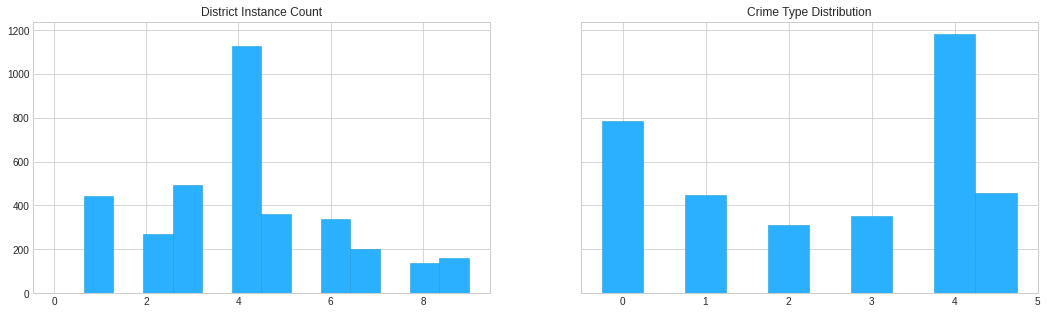

In [5]:
# plot distribution
import matplotlib.pyplot as plt

# set subplot features
plt.style.use('seaborn-whitegrid')
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(18,5))

# plot subplots
axs[0].hist(stlcrime_copy['district'], align = 'mid', facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5, bins=14)
axs[0].title.set_text('District Instance Count')
axs[1].hist(stlcrime_copy['description'], align = 'left', facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5, bins=10)
axs[1].title.set_text('Crime Type Distribution')

**District 4** is located in North City, St. Louis and overall has the most instances of crime present in the STLMPD data. Out of all the non-violent crimes indicated from the data, the most instances comes from encoding number 4 which is ***PUBLIC ORDER-OTHR UNSPC PBLC ORDER VIOLATION***. Second highest is instance zero: ***DISORDERLY CONDUCT-PEACE DSTRB/INDIVIDUAL***. 

#### **Labels transformed to numerical output:**
- *0 = DISORDERLY CONDUCT-PEACE DSTRB/INDIVIDUAL*
- *1 = DRUGS-POSSESSION/MARIJUANA*
- *2 = LIQUOR LAWS-OTHR UNSPEC LIQ OFFENSE*
- *3 = LOITERING-BEGGING*
- *4 = PUBLIC ORDER-OTHR UNSPC PBLC ORDER VIOLATION*
- *5 = PUBLIC ORDER-TRESPASSING*

In [6]:
# create copy
stlcrime_copy = stlcrime_copy.drop(['year', 'crime', 'neighborhood', 'address'],axis=1)

In [7]:
# set feature and label
stlcrime_feature = stlcrime_copy['district']
stlcrime_label = stlcrime_copy['description']

# train / test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(stlcrime_feature, stlcrime_label, test_size = 0.2, random_state = 42)

In [8]:
# reshape all data
import numpy as np
X_train_s = np.array(X_train).reshape((len(X_train), 1))
y_train_s = np.array(y_train).reshape((len(y_train), 1))
X_test_s = np.array(X_test).reshape((len(X_test), 1))
y_test_s = np.array(y_test).reshape((len(y_test), 1))

### **Decision Tree Classifier**
We can check to see if a classication analysis could even be possible with two types of machine learning classification algorithms. Since our data is very bleak with only one feature and one label, keep in mind that these algorithms won't perform well. Parsimonious classification models include good data that is sparse, normalized, predictable, complex, etc. 

The first classifier we'll use is a decision tree. A decision tree works like a flowchart that stops at each feature (*node*), each branch represents an outcome, and each leaf node represents a *label*. In this case, there is only one branch since our data has only one feature, but there are six leaf nodes since there are six labels.

In [9]:
# import decision tree module
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()

# train decision tree on training data
tree_clf.fit(X_train_s, y_train_s)

# import metrics module
from sklearn import metrics

# check training accuracy
y_pred = tree_clf.predict(X_train_s)
print("Training Accuracy: ", metrics.accuracy_score(y_train, y_pred))

# check testing accuracy
y_pred_test = tree_clf.predict(X_test_s)
print("Testing Accuracy: ", metrics.accuracy_score(y_test, y_pred_test))

Training Accuracy:  0.3437278525868179
Testing Accuracy:  0.34844192634560905


### **Random Forest Classifier**
Random forest are ensemble learning methods for classification that work by essentially generating multiple decision trees during training and outputting the class that is the **mode** of the classes.

Again, remember that these algorithms are not going to perform well based on our data, but we can at least examine the results to see if classification may be an option once we can combine some data to make the models more complex.

In [10]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier()

forest_clf.fit(X_train_s, y_train)

# check training accuracy
y_pred_rf = forest_clf.predict(X_train_s)
print("Training Accuracy: ", metrics.accuracy_score(y_train, y_pred_rf))

# check testing accuracy
y_pred_test_rf = forest_clf.predict(X_test_s)
print("Testing Accuracy: ", metrics.accuracy_score(y_test, y_pred_test_rf))

Training Accuracy:  0.3437278525868179
Testing Accuracy:  0.34844192634560905


Both the **Decision Tree Classifier** & **Random Forest Classifier** have poor training / testing accuracies, as expected considering both the labels and the feature's are one-dimensional. A solid approach to improving an accuracy of a classifiaction algorithm is to make the model more complex, i.e. add more features. Even *WITH* a single feature, the classification algorithm gives a 34% accuracy. With more features from other datasets possibly combined with the STLMPD data, these models have potential to predict racial bias in the police force by way of higher non-violent crime counts.

However, the STLMPD data simply lacks relevant features that could be used to predict crimes. One method of approaching this problem is to combine the STLMPD data with another dataset (*join via a unique column*) so that we can add complexity to the crime data and our model. Unfortunately the STLMPD data does not release the race of the perpetrator so we do not know the distribution of crime in St. Louis by race. This may be a potential pathway forward to mergining the idea of overpolicing and redlining. 